<a href="https://colab.research.google.com/github/StudentHagal/Thesis/blob/main/Statistical_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Modelling

## 0) Preparation

### Load Requirements

In [1]:
# Github Repo
!git clone https://github.com/StudentHagal/Thesis.git

# Libraries
import sys
import pandas as pd
import hashlib
import matplotlib
import numpy as np
import pandas as pd
import sklearn
import scipy
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

#Extension
!pip install ipython-autotime
%load_ext autotime

print('Load completed')


Cloning into 'Thesis'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 77 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Load completed
time: 1.21 ms (started: 2021-10-07 14:40:14 +00:00)


In [2]:
# Check the versions of libraries
# !!! WARNING !!!
# Important because model result may be different for other version
 
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pd.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('joblib: {}'.format(joblib.__version__))

Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1
joblib: 1.0.1
time: 5.32 ms (started: 2021-10-07 14:40:14 +00:00)


### Global variables

In [3]:
# Global Variable
compare = '10f68054068bc4ac4d7fee65e8fd7a184151e3ce3abce5d85350fc13c412d93b'                         #known hash value of file
#Stored file path                     
raw_file = "/content/Thesis/Resources/database.csv"
#environment path
main_dir = '/content/Thesis/'           
model_dir = '/content/Thesis/Resources/models/'                                  
process_dir = '/content/Thesis/Resources/Processed/'
#Column names for dataset
col_names = ['No', 'Datetime', 'Control_Mode', 'L1', 'L2', 'L3', 'Frequency', 'kVA_Total',           
             'kVA_L1', 'kVA_L2', 'kVA_L3', 'KVAr', 'Oil_Pressure', 'Coolant_Temp', 
             'Charger_Alternator', 'PF_Avg', 'PF_L1', 'PF_L2', 
             'PF_L3', 'L1_N', 'L2_N', 'L3_N', 'Source_Ext_Voltage', 'ECU_Temp', 
             'RPM', 'Train_code']
#Unused columns in dataset
unused_col = ['No', 'Control_Mode', 'L1', 'L2', 'L3', 'Frequency',                       
              'kVA_Total', 'kVA_L1', 'kVA_L2', 'kVA_L3', 'KVAr', 'Charger_Alternator',
              'RPM', 'PF_L1', 'PF_L2', 'PF_L3', 'L1_N','L2_N', 'L3_N',
              'Source_Ext_Voltage', 'Train_code']
df = pd.read_csv(raw_file, names=col_names)
features = ['Oil_Pressure', 'Coolant_Temp', 'PF_Avg', 'ECU_Temp']
results1 = []
names1 = []
results2 = []
names2 = []

# Algorithm considered
model_LR = LogisticRegression(max_iter=475)
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier()
model_SVM = SVC(gamma='auto')
model_RF = RandomForestClassifier()
model_LDA = LinearDiscriminantAnalysis()
model_NB = GaussianNB()
balancing_smote = SMOTE(random_state=1)
###################################################################
models = []
models.append(('LR', model_LR))
models.append(('KNN', model_KNN))
models.append(('DT', model_DT))
models.append(('SVM', model_SVM))
models.append(('RF', model_RF))
models.append(('LDA', model_LDA))
models.append(('NB', model_NB))


time: 143 ms (started: 2021-10-07 14:40:14 +00:00)


### Hash Check Function

In [4]:
# Function that returns the SHA-2 hash of the file
def hash_file(filepath):

   # make a hash object with SHA-2
   h = hashlib.sha256()

   # open file for reading in binary mode
   with open(filepath,'rb') as file:
       # loop till the end of the file
       chunk = 0
       while chunk != b'':
           # read only 1024 bytes at a time
           chunk = file.read(1024)
           h.update(chunk)

   # return the hex representation of digest
   return h.hexdigest()


time: 6.88 ms (started: 2021-10-07 14:40:14 +00:00)


## 1) Standardized Dataset

### Outlier

In [5]:
# Checking hash value of a file
file_path1 = process_dir+'labeled_dataset1.csv'
message = hash_file(file_path1)
print('SHA-256 value of your file is :')
print(message)

SHA-256 value of your file is :
14f81646f37364caefe0597ca89aa00d6097cd20db87310fb44678602d55defa
time: 6.18 ms (started: 2021-10-07 14:40:14 +00:00)


                 Datetime  Oil_Pressure  ...        Label  Train_code
0     2020-01-10 22:00:00         620.0  ...  Maintenance     P-01812
1     2020-03-10 18:00:00         604.0  ...  Maintenance     P-01812
2     2020-03-10 19:00:00         604.0  ...  Maintenance     P-01812
3     2020-04-16 10:00:00         620.0  ...  Maintenance     P-01812
4     2020-03-18 20:00:00         600.0  ...  Maintenance     P-01812
...                   ...           ...  ...          ...         ...
7992  2020-08-25 22:00:00         608.0  ...       Normal     P-01914
7993  2020-07-26 04:00:00         608.0  ...       Normal     P-01914
7994  2020-08-26 03:00:00         608.0  ...       Normal     P-01914
7995  2020-08-28 04:00:00         608.0  ...       Normal     P-01914
7996  2020-07-31 21:00:00         608.0  ...       Normal     P-01914

[7997 rows x 7 columns]
Training dataset size with outlier :  (7997, 7)
Label
Maintenance      56
Normal          372
Outlier        7569
dtype: int64
 
      

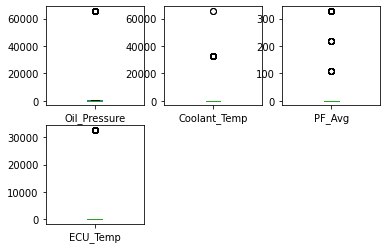

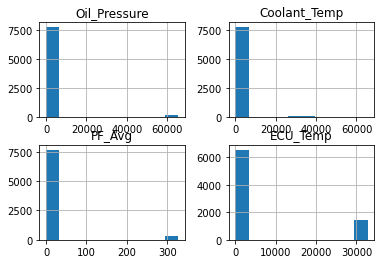

time: 1.18 s (started: 2021-10-07 14:40:15 +00:00)


In [6]:
#Training dataset summary 1 (include outlier)

#load file training dataset 1
labeled_dataset1 = pd.read_csv(file_path1,index_col=0)
print(labeled_dataset1)
#Visualize data
print('Training dataset size with outlier : ', labeled_dataset1.shape)
# class distribution
print(labeled_dataset1.groupby('Label').size())
print(' ')
# statistical value of data
print(labeled_dataset1.describe(percentiles=[.1, .4, .5, .6, .9]))
# box and whisker plots
labeled_dataset1.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
pyplot.show()
# histograms
labeled_dataset1.hist()
pyplot.show()


In [7]:
# Pre-process training and test dataset to balance class label (with outlier)

X1 = labeled_dataset1[features]
y1 = labeled_dataset1['Label']

print('Original dataset shape %s' % Counter(y1))
X1_res, y1_res = balancing_smote.fit_resample(X1, y1)
print('Resampled dataset shape %s' % Counter(y1_res))

Original dataset shape Counter({'Outlier': 7569, 'Normal': 372, 'Maintenance': 56})
Resampled dataset shape Counter({'Maintenance': 7569, 'Outlier': 7569, 'Normal': 7569})
time: 107 ms (started: 2021-10-07 14:40:16 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [8]:
# Split-out validation and test dataset (with outlier)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_res, y1_res, test_size=0.20, random_state=1)

print('training data size = ', X1_train.shape)
print('testing data size = ', X1_test.shape)
print('data split completed')

training data size =  (18165, 4)
testing data size =  (4542, 4)
data split completed
time: 10.6 ms (started: 2021-10-07 14:40:16 +00:00)


### No Outlier

In [9]:
# Checking hash value of a file
file_path2 = process_dir+'labeled_dataset2.csv'
message = hash_file(file_path2)
print('SHA-256 value of your file is :')
print(message)

SHA-256 value of your file is :
8c944d3f0fdaf327010fe0b4443b024672efb89a34f9ff83aa568dc66b0033ec
time: 4.17 ms (started: 2021-10-07 14:40:16 +00:00)


                Datetime  Oil_Pressure  ...        Label  Train_code
0    2020-01-10 22:00:00         620.0  ...  Maintenance     P-01812
1    2020-03-10 18:00:00         604.0  ...  Maintenance     P-01812
2    2020-03-10 19:00:00         604.0  ...  Maintenance     P-01812
3    2020-04-16 10:00:00         620.0  ...  Maintenance     P-01812
4    2020-03-18 20:00:00         600.0  ...  Maintenance     P-01812
..                   ...           ...  ...          ...         ...
423  2020-08-25 22:00:00         608.0  ...       Normal     P-01914
424  2020-07-26 04:00:00         608.0  ...       Normal     P-01914
425  2020-08-26 03:00:00         608.0  ...       Normal     P-01914
426  2020-08-28 04:00:00         608.0  ...       Normal     P-01914
427  2020-07-31 21:00:00         608.0  ...       Normal     P-01914

[428 rows x 7 columns]
Training dataset size excluding outlier :  (428, 7)
Label
Maintenance     56
Normal         372
dtype: int64
 
       Oil_Pressure  Coolant_Temp    

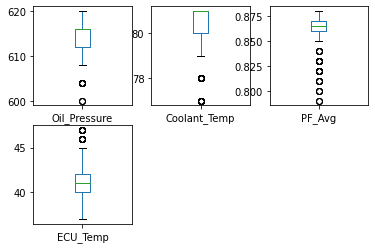

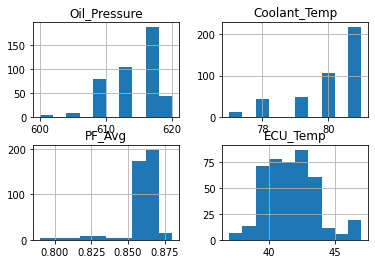

time: 942 ms (started: 2021-10-07 14:40:16 +00:00)


In [10]:
#Training dataset Summary 2 (exclude outlier)

# merge labelled data into training dataset
labeled_dataset2 = pd.read_csv(file_path2,index_col=0)
print(labeled_dataset2)

#Visualize data
print('Training dataset size excluding outlier : ', labeled_dataset2.shape)
# class distribution
print(labeled_dataset2.groupby('Label').size())
print(' ')
# statistical value of data
print(labeled_dataset2.describe(percentiles=[.1, .4, .5, .6, .9]))
# box and whisker plots
labeled_dataset2.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False)
pyplot.show()
# histograms
labeled_dataset2.hist()
pyplot.show()

In [11]:
# Pre-process training and test dataset to balance class label (with outlier)

X2 = labeled_dataset2[features]
y2 = labeled_dataset2['Label']

print('Original dataset shape %s' % Counter(y2))
X2_res, y2_res = balancing_smote.fit_resample(X2, y2)
print('Resampled dataset shape %s' % Counter(y2_res))

Original dataset shape Counter({'Normal': 372, 'Maintenance': 56})
Resampled dataset shape Counter({'Maintenance': 372, 'Normal': 372})
time: 14.9 ms (started: 2021-10-07 14:40:17 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# Split-out validation dataset (exclude outlier)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_res, y2_res, test_size=0.20, random_state=1)

print('training data size = ', X2_train.shape)
print('testing data size = ', X2_test.shape)
print('data split completed')

training data size =  (595, 4)
testing data size =  (149, 4)
data split completed
time: 8.2 ms (started: 2021-10-07 14:40:17 +00:00)


In [13]:
df_Unlabelled = pd.read_csv(process_dir+'unlabelled.csv',index_col=0)
df_Unlabelled

,Datetime,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Train_code
0,2020-01-08 02:03:00,636.0,81.0,0.83,32767.0,MP3-01605
1,2020-01-08 03:00:00,636.0,81.0,0.76,32767.0,MP3-01605
2,2020-01-08 04:00:00,632.0,82.0,0.77,32767.0,MP3-01605
3,2020-01-08 05:00:00,632.0,82.0,0.78,32767.0,MP3-01605
4,2020-01-08 06:00:00,628.0,82.0,0.78,32767.0,MP3-01605
...,...,...,...,...,...,...
34352,2020-12-31 13:00:00,600.0,83.0,0.88,32767.0,P-01914
34353,2020-12-31 14:00:00,604.0,82.0,0.88,32767.0,P-01914
34354,2020-12-31 15:00:00,604.0,81.0,0.87,32767.0,P-01914
34355,2020-12-31 16:00:00,0.0,0.0,0.00,0.0,P-01914


time: 70.6 ms (started: 2021-10-07 14:40:17 +00:00)


## 2) Algorithm Training & Validation

### Outlier

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.627800 (0.005728)
KNN: 0.999945 (0.000165)
DT: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
LDA: 0.399835 (0.006972)
NB: 0.990036 (0.002263)


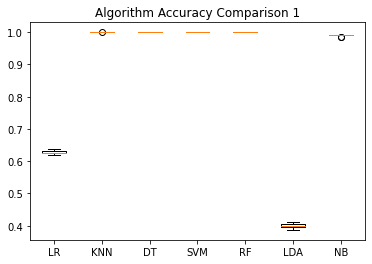

time: 41.9 s (started: 2021-10-07 14:40:17 +00:00)


In [14]:
# Cross validation of each model training in turn (with Outlier)
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X1_train, Y1_train, cv=kfold, 
                             scoring='accuracy')
	results1.append(cv_results)
	names1.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare result
pyplot.boxplot(results1, labels=names1)
pyplot.title('Algorithm Accuracy Comparison 1')
pyplot.show()

In [15]:
# Re-train each algorithm using whole training dataset with Outlier for better model
# Each model is separated in different code block for easier tracking of Runtime 
model1_LR = model_LR.fit(X1_train, Y1_train)
joblib.dump(model1_LR,model_dir+'Opsi1_LR.joblib')

['/content/Thesis/Resources/models/Opsi1_LR.joblib']

time: 3.15 s (started: 2021-10-07 14:40:59 +00:00)


In [16]:
model1_KNN = model_KNN.fit(X1_train, Y1_train)
joblib.dump(model1_KNN,model_dir+'Opsi1_KNN.joblib')

['/content/Thesis/Resources/models/Opsi1_KNN.joblib']

time: 89.7 ms (started: 2021-10-07 14:41:02 +00:00)


In [17]:
model1_DT = model_DT.fit(X1_train, Y1_train)
joblib.dump(model1_DT,model_dir+'Opsi1_DT.joblib')

['/content/Thesis/Resources/models/Opsi1_DT.joblib']

time: 33.9 ms (started: 2021-10-07 14:41:02 +00:00)


In [18]:
model1_SVM = model_SVM.fit(X1_train, Y1_train)
joblib.dump(model1_SVM,model_dir+'Opsi1_SVM.joblib')

['/content/Thesis/Resources/models/Opsi1_SVM.joblib']

time: 953 ms (started: 2021-10-07 14:41:02 +00:00)


In [19]:
model1_RF = model_RF.fit(X1_train, Y1_train)
joblib.dump(model1_RF,model_dir+'Opsi1_RF.joblib')

['/content/Thesis/Resources/models/Opsi1_RF.joblib']

time: 675 ms (started: 2021-10-07 14:41:03 +00:00)


In [20]:
model1_LDA = model_LDA.fit(X1_train, Y1_train)
joblib.dump(model1_LDA,model_dir+'Opsi1_LDA.joblib')

['/content/Thesis/Resources/models/Opsi1_LDA.joblib']

time: 70.8 ms (started: 2021-10-07 14:41:04 +00:00)


In [21]:
model1_NB = model_NB.fit(X1_train, Y1_train)
joblib.dump(model1_NB,model_dir+'Opsi1_NB.joblib')

['/content/Thesis/Resources/models/Opsi1_NB.joblib']

time: 52.9 ms (started: 2021-10-07 14:41:04 +00:00)


In [22]:
print('Model with outlier training completed!')

Model with outlier training completed!
time: 3.98 ms (started: 2021-10-07 14:41:04 +00:00)


### No Outlier

In [23]:
# Algorithm considered
model_LR = LogisticRegression(max_iter=475)
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier()
model_SVM = SVC(gamma='auto')
model_RF = RandomForestClassifier()
model_LDA = LinearDiscriminantAnalysis()
model_NB = GaussianNB()
model_Kmeans = KMeans(n_clusters=3, random_state=0)
model_dbscan = DBSCAN(eps=0.5, min_samples=100)
###################################################################
models = []
models.append(('LR', model_LR))
models.append(('KNN', model_KNN))
models.append(('DT', model_DT))
models.append(('SVM', model_SVM))
models.append(('RF', model_RF))
models.append(('LDA', model_LDA))
models.append(('NB', model_NB))


time: 15.7 ms (started: 2021-10-07 14:41:04 +00:00)


LR: 0.978192 (0.044949)
KNN: 1.000000 (0.000000)
DT: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
LDA: 0.989915 (0.013447)
NB: 1.000000 (0.000000)


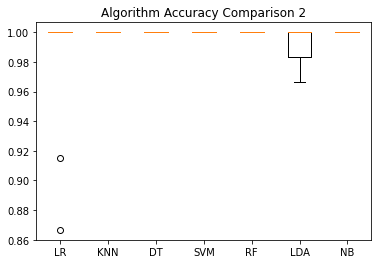

time: 2.08 s (started: 2021-10-07 14:41:04 +00:00)


In [24]:
# evaluate each model training in turn (exclude Outlier)
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X2_train, Y2_train, cv=kfold, 
                             scoring='accuracy')
	results2.append(cv_results)
	names2.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare result
pyplot.boxplot(results2, labels=names2)
pyplot.title('Algorithm Accuracy Comparison 2')
pyplot.show()

In [25]:
# Re-train each algorithm using whole training dataset excluding Outlier for better model 
# Each model is separated in different code block for easier tracking of Runtime
model2_LR = model_LR.fit(X2_train, Y2_train)
joblib.dump(model2_LR,model_dir+'Opsi2_LR.joblib')

['/content/Thesis/Resources/models/Opsi2_LR.joblib']

time: 37.9 ms (started: 2021-10-07 14:41:06 +00:00)


In [26]:
model2_KNN = model_KNN.fit(X2_train, Y2_train)
joblib.dump(model2_KNN,model_dir+'Opsi2_KNN.joblib')

['/content/Thesis/Resources/models/Opsi2_KNN.joblib']

time: 11.7 ms (started: 2021-10-07 14:41:06 +00:00)


In [27]:
model2_DT = model_DT.fit(X2_train, Y2_train)
joblib.dump(model2_DT,model_dir+'Opsi2_DT.joblib')

['/content/Thesis/Resources/models/Opsi2_DT.joblib']

time: 11.2 ms (started: 2021-10-07 14:41:06 +00:00)


In [28]:
model2_SVM = model_SVM.fit(X2_train, Y2_train)
joblib.dump(model2_SVM,model_dir+'Opsi2_SVM.joblib')

['/content/Thesis/Resources/models/Opsi2_SVM.joblib']

time: 15.2 ms (started: 2021-10-07 14:41:06 +00:00)


In [29]:
model2_RF = model_RF.fit(X2_train, Y2_train)
joblib.dump(model2_RF,model_dir+'Opsi2_RF.joblib')

['/content/Thesis/Resources/models/Opsi2_RF.joblib']

time: 296 ms (started: 2021-10-07 14:41:06 +00:00)


In [30]:
model2_LDA = model_LDA.fit(X2_train, Y2_train)
joblib.dump(model2_LDA,model_dir+'Opsi2_LDA.joblib')

['/content/Thesis/Resources/models/Opsi2_LDA.joblib']

time: 19.1 ms (started: 2021-10-07 14:41:06 +00:00)


In [31]:
model2_NB = model_NB.fit(X2_train, Y2_train)
joblib.dump(model2_NB,model_dir+'Opsi2_NB.joblib')

['/content/Thesis/Resources/models/Opsi2_NB.joblib']

time: 8.42 ms (started: 2021-10-07 14:41:07 +00:00)


In [32]:
print('Model no outlier training completed!')

Model no outlier training completed!
time: 2.21 ms (started: 2021-10-07 14:41:07 +00:00)


# ML Model Evaluation


## 1) ML Model Testing


### Test With Outlier

In [33]:
#Correct label
print('Correct label distribution:')
print(accuracy_score(Y1_test, Y1_test))
print(confusion_matrix(Y1_test, Y1_test))


Correct label distribution:
1.0
[[1570    0    0]
 [   0 1455    0]
 [   0    0 1517]]
time: 29.2 ms (started: 2021-10-07 14:41:07 +00:00)


LR Result:
0.6164685160722149
              precision    recall  f1-score   support

 Maintenance       0.00      0.00      0.00      1570
      Normal       0.46      1.00      0.63      1455
     Outlier       1.00      0.89      0.94      1517

    accuracy                           0.62      4542
   macro avg       0.49      0.63      0.52      4542
weighted avg       0.48      0.62      0.51      4542



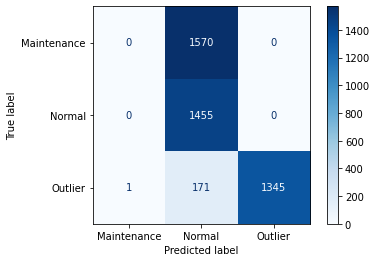

time: 344 ms (started: 2021-10-07 14:41:07 +00:00)


In [34]:
# Make predictions on validation dataset (with Outlier)
pred_LR = model1_LR.predict(X1_test)

print('LR Result:')
print(accuracy_score(Y1_test, pred_LR))
print(classification_report(Y1_test, pred_LR))
plot_confusion_matrix(model1_LR, X1_test, Y1_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

KNN Result:
0.9997798326728313
              precision    recall  f1-score   support

 Maintenance       1.00      1.00      1.00      1570
      Normal       1.00      1.00      1.00      1455
     Outlier       1.00      1.00      1.00      1517

    accuracy                           1.00      4542
   macro avg       1.00      1.00      1.00      4542
weighted avg       1.00      1.00      1.00      4542



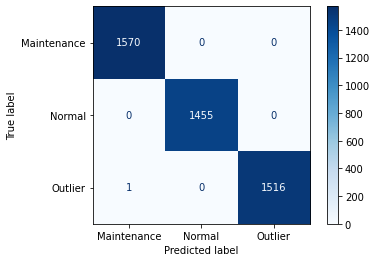

time: 786 ms (started: 2021-10-07 14:41:07 +00:00)


In [35]:
pred_KNN = model1_KNN.predict(X1_test)

print('KNN Result:')
print(accuracy_score(Y1_test, pred_KNN))
print(classification_report(Y1_test, pred_KNN))
plot_confusion_matrix(model1_KNN, X1_test, Y1_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

DT Result:
1.0
              precision    recall  f1-score   support

 Maintenance       1.00      1.00      1.00      1570
      Normal       1.00      1.00      1.00      1455
     Outlier       1.00      1.00      1.00      1517

    accuracy                           1.00      4542
   macro avg       1.00      1.00      1.00      4542
weighted avg       1.00      1.00      1.00      4542



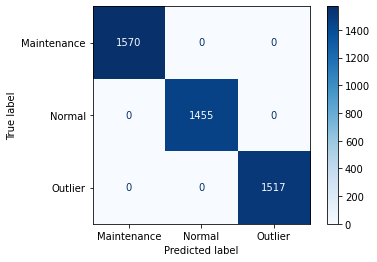

time: 329 ms (started: 2021-10-07 14:41:08 +00:00)


In [36]:
pred_DT = model1_DT.predict(X1_test)

print('DT Result:')
print(accuracy_score(Y1_test, pred_DT))
print(classification_report(Y1_test, pred_DT))
plot_confusion_matrix(model1_DT, X1_test, Y1_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

SVM Result:
1.0
              precision    recall  f1-score   support

 Maintenance       1.00      1.00      1.00      1570
      Normal       1.00      1.00      1.00      1455
     Outlier       1.00      1.00      1.00      1517

    accuracy                           1.00      4542
   macro avg       1.00      1.00      1.00      4542
weighted avg       1.00      1.00      1.00      4542



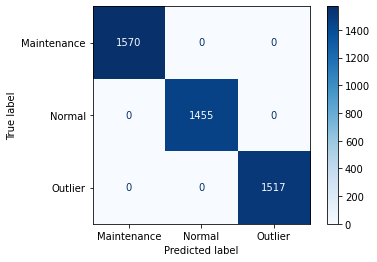

time: 583 ms (started: 2021-10-07 14:41:08 +00:00)


In [37]:
pred_SVM = model1_SVM.predict(X1_test)

print('SVM Result:')
print(accuracy_score(Y1_test, pred_SVM))
print(classification_report(Y1_test, pred_SVM))
plot_confusion_matrix(model1_SVM, X1_test, Y1_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

RF Result:
1.0
              precision    recall  f1-score   support

 Maintenance       1.00      1.00      1.00      1570
      Normal       1.00      1.00      1.00      1455
     Outlier       1.00      1.00      1.00      1517

    accuracy                           1.00      4542
   macro avg       1.00      1.00      1.00      4542
weighted avg       1.00      1.00      1.00      4542



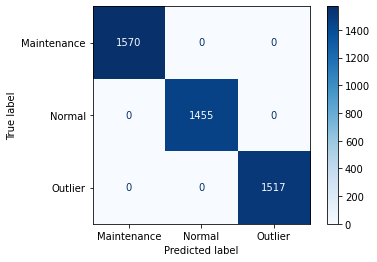

time: 403 ms (started: 2021-10-07 14:41:09 +00:00)


In [38]:
pred_RF = model1_RF.predict(X1_test)

print('RF Result:')
print(accuracy_score(Y1_test, pred_RF))
print(classification_report(Y1_test, pred_RF))
plot_confusion_matrix(model1_RF, X1_test, Y1_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

LDA Result:
0.38463232056362834
              precision    recall  f1-score   support

 Maintenance       0.00      0.00      0.00      1570
      Normal       0.34      1.00      0.51      1455
     Outlier       1.00      0.19      0.32      1517

    accuracy                           0.38      4542
   macro avg       0.45      0.40      0.28      4542
weighted avg       0.44      0.38      0.27      4542



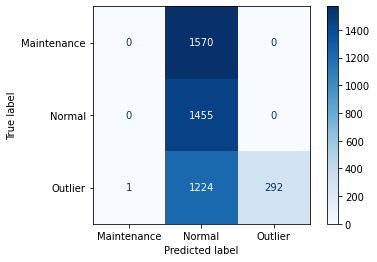

time: 316 ms (started: 2021-10-07 14:41:09 +00:00)


In [39]:
pred_LDA = model1_LDA.predict(X1_test)

print('LDA Result:')
print(accuracy_score(Y1_test, pred_LDA))
print(classification_report(Y1_test, pred_LDA))
plot_confusion_matrix(model1_LDA, X1_test, Y1_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

NB Result:
0.9907529722589168
              precision    recall  f1-score   support

 Maintenance       0.98      1.00      0.99      1570
      Normal       1.00      1.00      1.00      1455
     Outlier       1.00      0.97      0.99      1517

    accuracy                           0.99      4542
   macro avg       0.99      0.99      0.99      4542
weighted avg       0.99      0.99      0.99      4542



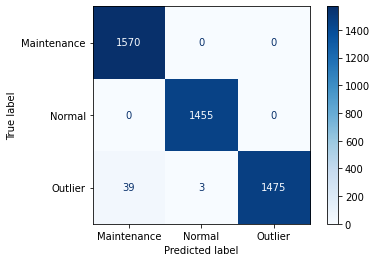

time: 287 ms (started: 2021-10-07 14:41:09 +00:00)


In [40]:
pred_NB = model1_NB.predict(X1_test)

print('NB Result:')
print(accuracy_score(Y1_test, pred_NB))
print(classification_report(Y1_test, pred_NB))
plot_confusion_matrix(model1_NB, X1_test, Y1_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

### Test No Outlier

In [41]:
# Each model is separated in different code block for easier tracking of Runtime
#Correct label
print('Correct label distribution:')
print(accuracy_score(Y2_test, Y2_test))
print(confusion_matrix(Y2_test, Y2_test))

Correct label distribution:
1.0
[[75  0]
 [ 0 74]]
time: 7.13 ms (started: 2021-10-07 14:41:10 +00:00)


LR Result:
1.0
              precision    recall  f1-score   support

 Maintenance       1.00      1.00      1.00        75
      Normal       1.00      1.00      1.00        74

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



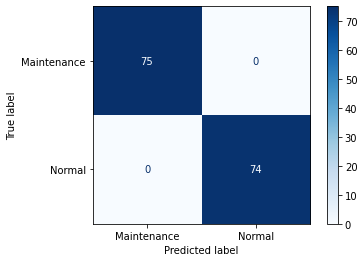

time: 180 ms (started: 2021-10-07 14:41:10 +00:00)


In [42]:
# Make predictions on validation dataset (with Outlier)
pred_LR = model2_LR.predict(X2_test)

print('LR Result:')
print(accuracy_score(Y2_test, pred_LR))
print(classification_report(Y2_test, pred_LR))
plot_confusion_matrix(model2_LR, X2_test, Y2_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

KNN Result:
1.0
              precision    recall  f1-score   support

 Maintenance       1.00      1.00      1.00        75
      Normal       1.00      1.00      1.00        74

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



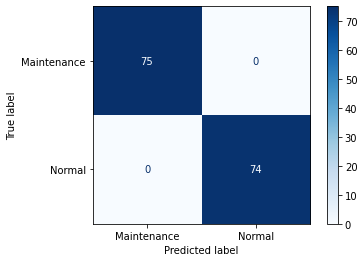

time: 192 ms (started: 2021-10-07 14:41:10 +00:00)


In [43]:
pred_KNN = model2_KNN.predict(X2_test)

print('KNN Result:')
print(accuracy_score(Y2_test, pred_KNN))
print(classification_report(Y2_test, pred_KNN))
plot_confusion_matrix(model2_KNN, X2_test, Y2_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

DT Result:
1.0
              precision    recall  f1-score   support

 Maintenance       1.00      1.00      1.00        75
      Normal       1.00      1.00      1.00        74

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



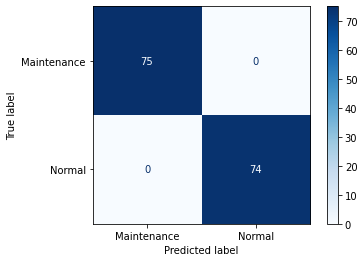

time: 180 ms (started: 2021-10-07 14:41:10 +00:00)


In [44]:
pred_DT = model2_DT.predict(X2_test)

print('DT Result:')
print(accuracy_score(Y2_test, pred_DT))
print(classification_report(Y2_test, pred_DT))
plot_confusion_matrix(model2_DT, X2_test, Y2_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

SVM Result:
1.0
              precision    recall  f1-score   support

 Maintenance       1.00      1.00      1.00        75
      Normal       1.00      1.00      1.00        74

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



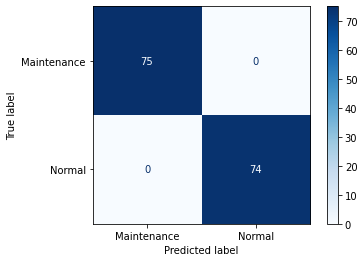

time: 291 ms (started: 2021-10-07 14:41:10 +00:00)


In [45]:
pred_SVM = model2_SVM.predict(X2_test)

print('SVM Result:')
print(accuracy_score(Y2_test, pred_SVM))
print(classification_report(Y2_test, pred_SVM))
plot_confusion_matrix(model2_SVM, X2_test, Y2_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

RF Result:
1.0
              precision    recall  f1-score   support

 Maintenance       1.00      1.00      1.00        75
      Normal       1.00      1.00      1.00        74

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



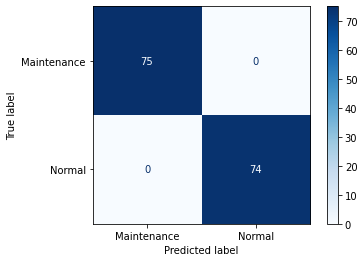

time: 208 ms (started: 2021-10-07 14:41:11 +00:00)


In [46]:
pred_RF = model2_RF.predict(X2_test)

print('RF Result:')
print(accuracy_score(Y2_test, pred_RF))
print(classification_report(Y2_test, pred_RF))
plot_confusion_matrix(model2_RF, X2_test, Y2_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

LDA Result:
0.9798657718120806
              precision    recall  f1-score   support

 Maintenance       0.96      1.00      0.98        75
      Normal       1.00      0.96      0.98        74

    accuracy                           0.98       149
   macro avg       0.98      0.98      0.98       149
weighted avg       0.98      0.98      0.98       149



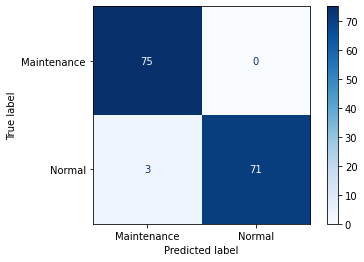

time: 187 ms (started: 2021-10-07 14:41:11 +00:00)


In [47]:
pred_LDA = model2_LDA.predict(X2_test)

print('LDA Result:')
print(accuracy_score(Y2_test, pred_LDA))
print(classification_report(Y2_test, pred_LDA))
plot_confusion_matrix(model2_LDA, X2_test, Y2_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

NB Result:
1.0
              precision    recall  f1-score   support

 Maintenance       1.00      1.00      1.00        75
      Normal       1.00      1.00      1.00        74

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149



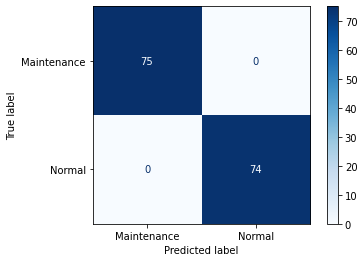

time: 186 ms (started: 2021-10-07 14:41:11 +00:00)


In [48]:
pred_NB = model2_NB.predict(X2_test)

print('NB Result:')
print(accuracy_score(Y2_test, pred_NB))
print(classification_report(Y2_test, pred_NB))
plot_confusion_matrix(model2_NB, X2_test, Y2_test, values_format='d', cmap=plt.cm.Blues)
plt.show()

### Prediction Test with Outlier

In [49]:
# Make predictions on unlabelled dataset with outlier
predictions1_LR = model1_LR.predict(df_Unlabelled[features])
predictions1_KNN = model1_KNN.predict(df_Unlabelled[features])
predictions1_DT = model1_DT.predict(df_Unlabelled[features])
predictions1_SVM = model1_SVM.predict(df_Unlabelled[features])
predictions1_RF = model1_RF.predict(df_Unlabelled[features])
predictions1_LDA = model1_LDA.predict(df_Unlabelled[features])
predictions1_NB = model1_NB.predict(df_Unlabelled[features])

df_predict1 =  pd.DataFrame({'LR': predictions1_LR, 'KNN': predictions1_KNN,
                         'DT':predictions1_DT, 'SVM':predictions1_SVM,
                         'RF':predictions1_RF, 'LDA':predictions1_LDA,
                         'NB':predictions1_NB})

df_predict1

,LR,KNN,DT,SVM,RF,LDA,NB
0,Outlier,Outlier,Normal,Outlier,Normal,Outlier,Outlier
1,Outlier,Outlier,Normal,Outlier,Outlier,Outlier,Outlier
2,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
3,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
4,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
...,...,...,...,...,...,...,...
33827,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
33828,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
33829,Outlier,Outlier,Normal,Outlier,Normal,Outlier,Outlier
33830,Outlier,Outlier,Outlier,Outlier,Outlier,Normal,Outlier


time: 2.75 s (started: 2021-10-07 14:41:11 +00:00)


### Prediction Test no Outlier

In [50]:
# Make predictions on unlabelled dataset no outlier
predictions2_LR = model2_LR.predict(df_Unlabelled[features])
predictions2_KNN = model2_KNN.predict(df_Unlabelled[features])
predictions2_DT = model2_DT.predict(df_Unlabelled[features])
predictions2_SVM = model2_SVM.predict(df_Unlabelled[features])
predictions2_RF = model2_RF.predict(df_Unlabelled[features])
predictions2_LDA = model2_LDA.predict(df_Unlabelled[features])
predictions2_NB = model2_NB.predict(df_Unlabelled[features])

df_predict2 =  pd.DataFrame({'LR': predictions2_LR, 'KNN': predictions2_KNN,
                         'DT':predictions2_DT, 'SVM':predictions2_SVM,
                         'RF':predictions2_RF, 'LDA':predictions2_LDA,
                         'NB':predictions2_NB})


df_predict2

,LR,KNN,DT,SVM,RF,LDA,NB
0,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
1,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
2,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
3,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
4,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
...,...,...,...,...,...,...,...
33827,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
33828,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
33829,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
33830,Maintenance,Maintenance,Maintenance,Normal,Maintenance,Maintenance,Maintenance


time: 1.36 s (started: 2021-10-07 14:41:14 +00:00)


## 2) Result Documenting

In [51]:
df_result1 = pd.concat([df_Unlabelled.reset_index(drop=True), df_predict1.reset_index(drop=True)],axis=1)

df_result1

,Datetime,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Train_code,LR,KNN,DT,SVM,RF,LDA,NB
0,2020-01-08 02:03:00,636.0,81.0,0.83,32767.0,MP3-01605,Outlier,Outlier,Normal,Outlier,Normal,Outlier,Outlier
1,2020-01-08 03:00:00,636.0,81.0,0.76,32767.0,MP3-01605,Outlier,Outlier,Normal,Outlier,Outlier,Outlier,Outlier
2,2020-01-08 04:00:00,632.0,82.0,0.77,32767.0,MP3-01605,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
3,2020-01-08 05:00:00,632.0,82.0,0.78,32767.0,MP3-01605,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
4,2020-01-08 06:00:00,628.0,82.0,0.78,32767.0,MP3-01605,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33827,2020-12-31 13:00:00,600.0,83.0,0.88,32767.0,P-01914,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
33828,2020-12-31 14:00:00,604.0,82.0,0.88,32767.0,P-01914,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier,Outlier
33829,2020-12-31 15:00:00,604.0,81.0,0.87,32767.0,P-01914,Outlier,Outlier,Normal,Outlier,Normal,Outlier,Outlier
33830,2020-12-31 16:00:00,0.0,0.0,0.00,0.0,P-01914,Outlier,Outlier,Outlier,Outlier,Outlier,Normal,Outlier


time: 75.8 ms (started: 2021-10-07 14:41:15 +00:00)


In [52]:
df_result2 = pd.concat([df_Unlabelled.reset_index(drop=True), df_predict2.reset_index(drop=True)],axis=1)
df_result2

,Datetime,Oil_Pressure,Coolant_Temp,PF_Avg,ECU_Temp,Train_code,LR,KNN,DT,SVM,RF,LDA,NB
0,2020-01-08 02:03:00,636.0,81.0,0.83,32767.0,MP3-01605,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
1,2020-01-08 03:00:00,636.0,81.0,0.76,32767.0,MP3-01605,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
2,2020-01-08 04:00:00,632.0,82.0,0.77,32767.0,MP3-01605,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
3,2020-01-08 05:00:00,632.0,82.0,0.78,32767.0,MP3-01605,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
4,2020-01-08 06:00:00,628.0,82.0,0.78,32767.0,MP3-01605,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33827,2020-12-31 13:00:00,600.0,83.0,0.88,32767.0,P-01914,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
33828,2020-12-31 14:00:00,604.0,82.0,0.88,32767.0,P-01914,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
33829,2020-12-31 15:00:00,604.0,81.0,0.87,32767.0,P-01914,Maintenance,Maintenance,Normal,Normal,Normal,Maintenance,Maintenance
33830,2020-12-31 16:00:00,0.0,0.0,0.00,0.0,P-01914,Maintenance,Maintenance,Maintenance,Normal,Maintenance,Maintenance,Maintenance


time: 48.8 ms (started: 2021-10-07 14:41:15 +00:00)


In [53]:
df_result1.to_csv(process_dir+'predict1_smote.csv')
df_result2.to_csv(process_dir+'predict2_smote.csv')

time: 506 ms (started: 2021-10-07 14:41:16 +00:00)
